In [1]:
import numpy as np
import pandas as pd
import utils
from operator import itemgetter


In [2]:
tracks = pd.read_csv('../input/tracks.csv')
train = pd.read_csv('../input/train.csv')
target = pd.read_csv('../input/target_playlists.csv')

In [3]:
icm_csr = utils.build_icm_csr(tracks)
urm_csr = utils.build_urm_csr(train)

/home/antonio/anaconda3/lib/python3.6/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [4]:
target = target.get_values()[:,0]

In [5]:
users_listened = []
for item in target:
    nnz = len(urm_csr.getrow(item).data)
    users_listened.append([item,nnz])

In [14]:
sorted_list = sorted(users_listened,key=itemgetter(1))


In [15]:
sorted_list = np.array(sorted_list)

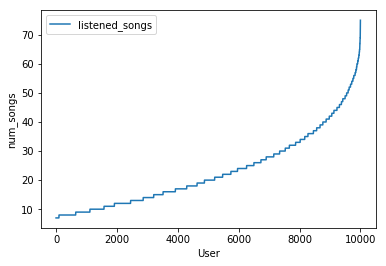

In [16]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(sorted_list[:,1], label="listened_songs")
pyplot.ylabel('num_songs')
pyplot.xlabel('User')
pyplot.legend()
pyplot.show()

In [17]:
user_lower_than15 = []
user_lower_than30 = []
user_upper = []

for item in sorted_list:
    if item[1] < 15:
        user_lower_than15.append(item[0])
    elif item[1] < 30:
        user_lower_than30.append(item[0])
    else:
        user_upper.append(item[0])

In [19]:
len(user_lower_than15)

3207

In [20]:
len(user_lower_than30)

4137

In [21]:
len(user_upper)

2656

In [22]:
users_ordered = target[:5000]
user_no_ordered = target[5000:]

In [25]:
users_ordered

5000

In [26]:
user_no_ordered

5000

In [27]:
users_listened_ordered = []
for item in users_ordered:
    nnz = len(urm_csr.getrow(item).data)
    users_listened_ordered.append([item,nnz])

In [28]:
users_listened_no_ordered = []
for item in user_no_ordered:
    nnz = len(urm_csr.getrow(item).data)
    users_listened_no_ordered.append([item,nnz])

In [29]:
user_listened_ordered_sorted = np.array(sorted(users_listened_ordered,key=itemgetter(1))) 

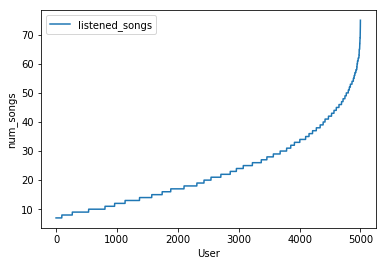

In [30]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(user_listened_ordered_sorted[:,1], label="listened_songs")
pyplot.ylabel('num_songs')
pyplot.xlabel('User')
pyplot.legend()
pyplot.show()

In [33]:
user_listened_no_ordered_sorted = np.array(sorted(users_listened_no_ordered,key=itemgetter(1))) 

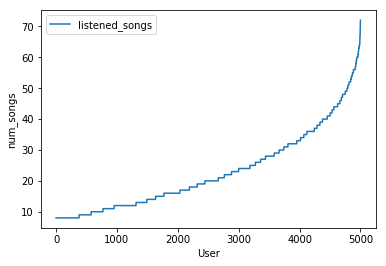

In [34]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(user_listened_no_ordered_sorted[:,1], label="listened_songs")
pyplot.ylabel('num_songs')
pyplot.xlabel('User')
pyplot.legend()
pyplot.show()

In [35]:
user_ordered_lower_than15 = []
user_ordered_lower_than30 = []
user_ordered_upper = []

for item in user_listened_ordered_sorted:
    if item[1] < 15:
        user_ordered_lower_than15.append(item[0])
    elif item[1] < 30:
        user_ordered_lower_than30.append(item[0])
    else:
        user_ordered_upper.append(item[0])

In [36]:
user_no_ordered_lower_than15 = []
user_no_ordered_lower_than30 = []
user_no_ordered_upper = []

for item in user_listened_no_ordered_sorted:
    if item[1] < 15:
        user_no_ordered_lower_than15.append(item[0])
    elif item[1] < 30:
        user_no_ordered_lower_than30.append(item[0])
    else:
        user_no_ordered_upper.append(item[0])

In [37]:
len(user_no_ordered_lower_than15)

1635

In [38]:
len(user_no_ordered_lower_than30)

2028

In [39]:
len(user_no_ordered_upper)

1337

In [40]:
len(user_ordered_lower_than15)

1572

In [41]:
len(user_ordered_lower_than30)

2109

In [42]:
len(user_ordered_upper)

1319